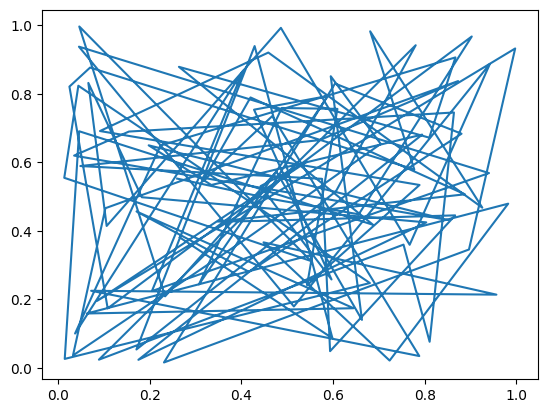

In [2]:
import matplotlib.pyplot as plt
import matplotlib.artist as martist
import numpy as np

fig, ax = plt.subplots()
x, y = np.random.rand(2, 100)
lines = ax.plot(x, y, '-', label='example')
print(lines)

In [3]:
print(ax.get_lines())
print(ax.get_lines()[0])

<a list of 1 Line2D objects>
Line2D(example)


[None, None]

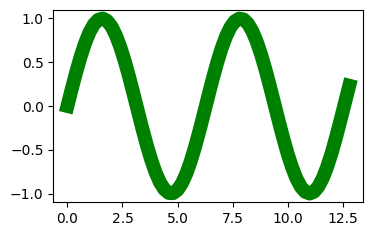

In [4]:
'''
Changing Artist properties
Getting the lines object gives us access to all the properties of the Line2D object. 
So if we want to change the linewidth after the fact, we can do so using Artist.set.
'''
fig, ax = plt.subplots(figsize=(4, 2.5))
x = np.arange(0, 13, 0.2)
y = np.sin(x)
lines = ax.plot(x, y, '-', label='example', linewidth=0.2, color='blue')
lines[0].set(color='green', linewidth=10)

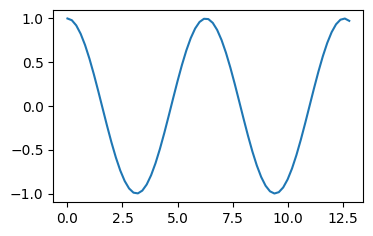

In [5]:
'''
Changing Artist data
In addition to styling properties like color and linewidth, the Line2D object has a data property. 
You can set the data after the line has been created using Line2D.set_data. 
This is often used for Animations, where the same line is shown evolving over time
Most Artists have a usable remove method that will remove the Artist from its Axes list. eg lines[0].remove().
'''
fig, ax = plt.subplots(figsize=(4, 2.5))
x = np.arange(0, 13, 0.2)
y = np.sin(x)
lines = ax.plot(x, y, '-', label='example')
lines[0].set_data([x, np.cos(x)])

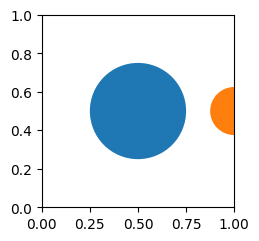

In [6]:
'''
Manually adding Artists
Not all Artists have helper methods, or you may want to use a low-level method for some reason. 
For example the patches.Circle Artist does not have a helper, but we can still create and add to an Axes using the axes.Axes.add_artist method:
'''
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(4, 2.5))
circle = mpatches.Circle((0.5, 0.5), 0.25, ec="none")
ax.add_artist(circle)
clipped_circle = mpatches.Circle((1, 0.5), 0.125, ec="none", facecolor='C1')
ax.add_artist(clipped_circle)
ax.set_aspect(1)

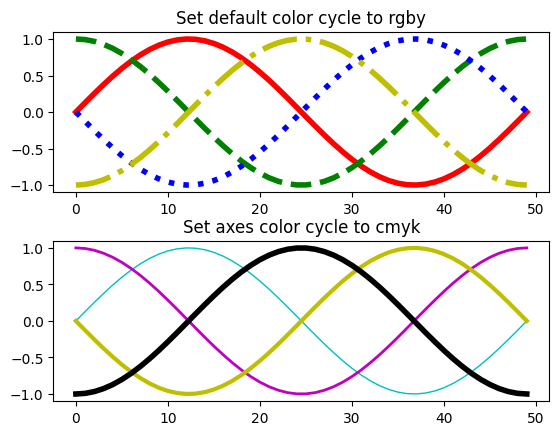

In [9]:
#Automated color cycle
from cycler import cycler

x = np.linspace(0, 2 * np.pi, 50)
offsets = np.linspace(0, 2 * np.pi, 4, endpoint=False)
yy = np.transpose([np.sin(x + phi) for phi in offsets])
default_cycler = (cycler(color=['r', 'g', 'b', 'y']) +
                  cycler(linestyle=['-', '--', ':', '-.']))

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)
custom_cycler = (cycler(color=['c', 'm', 'y', 'k']) +
                 cycler(lw=[1, 2, 3, 4]))

fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')
ax1.set_prop_cycle(custom_cycler)
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

# Add a bit more space between the two plots.
fig.subplots_adjust(hspace=0.3)
plt.show()

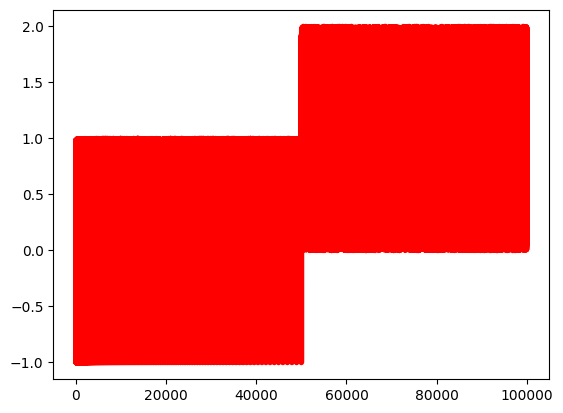

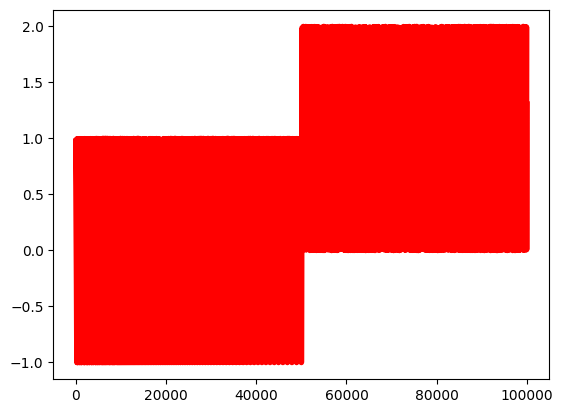

In [10]:
#Line segment simplification
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.geomspace(10, 50000, 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)
plt.show()

mpl.rcParams['path.simplify_threshold'] = 1.0
plt.plot(y)
plt.show()

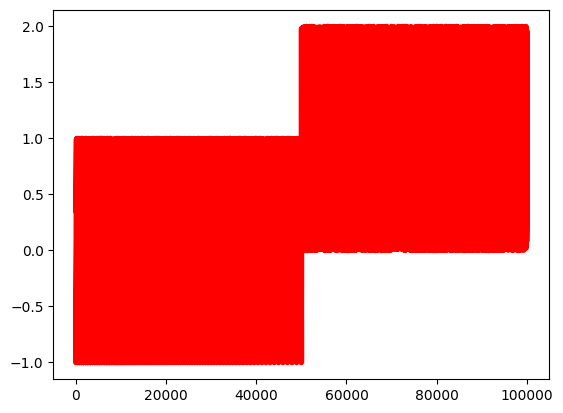

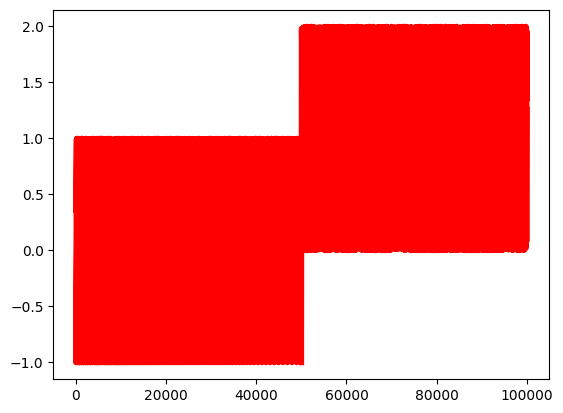

In [11]:
#Splitting lines into smaller chunks
mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.geomspace(10, 50000, 400).astype(int)] = -1
mpl.rcParams['path.simplify'] = True

mpl.rcParams['agg.path.chunksize'] = 0
plt.plot(y)
plt.show()

mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y)
plt.show()

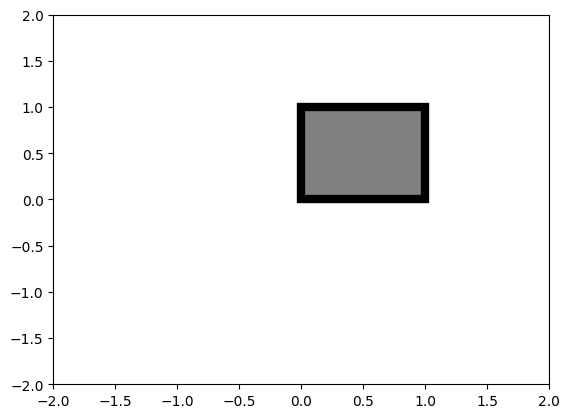

In [17]:
import matplotlib.patches as patches
from matplotlib.path import Path

verts = [
   (0., 0.),  # left, bottom
   (0., 1.),  # left, top
   (1., 1.),  # right, top
   (1., 0.),  # right, bottom
   (0., 0.),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='grey', lw=6)
ax.add_patch(patch)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

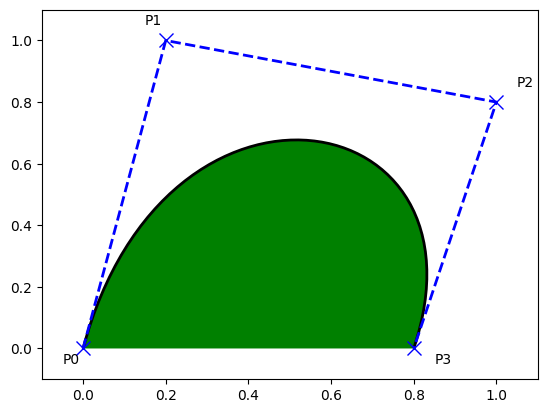

In [15]:
#Bezier example
verts = [
   (0., 0.),   # P0
   (0.2, 1.),  # P1
   (1., 0.8),  # P2
   (0.8, 0.),  # P3
]

codes = [
    Path.MOVETO,
    Path.CURVE4,
    Path.CURVE4,
    Path.CURVE4,
]

path = Path(verts, codes)

fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor='green', lw=2)
ax.add_patch(patch)

xs, ys = zip(*verts)
ax.plot(xs, ys, 'x--', lw=2, color='blue', ms=10)

ax.text(-0.05, -0.05, 'P0')
ax.text(0.15, 1.05, 'P1')
ax.text(1.05, 0.85, 'P2')
ax.text(0.85, -0.05, 'P3')

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
plt.show()

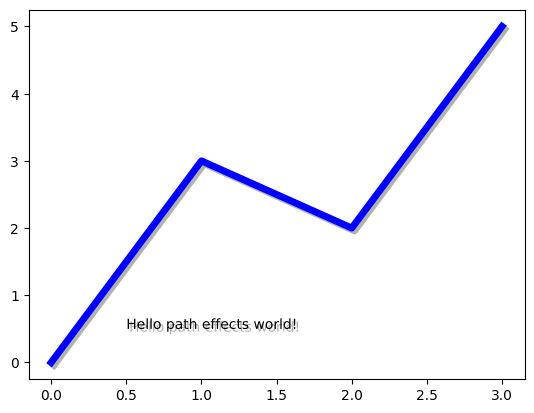

In [20]:
#Adding a shadow
import matplotlib.patheffects as path_effects

text = plt.text(0.5, 0.5, 'Hello path effects world!',
                path_effects=[path_effects.withSimplePatchShadow()])

plt.plot([0, 3, 2, 5], linewidth=5, color='blue',
         path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
plt.show()

In [21]:
#Making an artist stand out
fig = plt.figure(figsize=(7, 1))
text = fig.text(0.5, 0.5, 'This text stands out because of\n'
                          'its black border.', color='white',
                          ha='center', va='center', size=30)
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'),
                       path_effects.Normal()])
plt.show()

<Figure size 700x100 with 0 Axes>

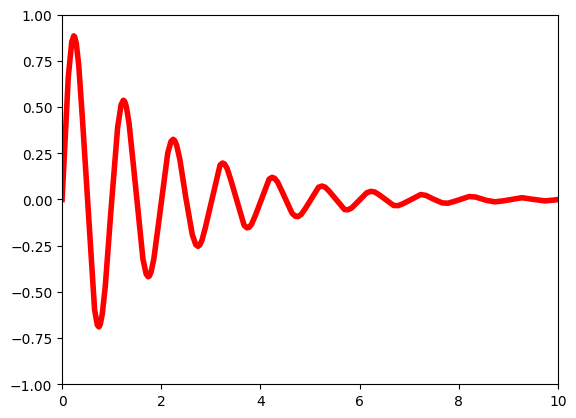

In [22]:
#Data coordinates
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

plt.show()

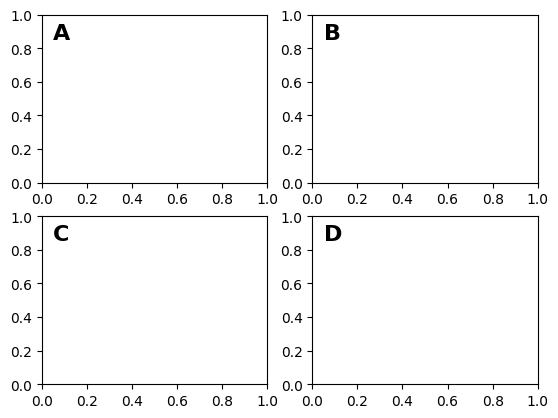

In [23]:
#Axes coordinates
fig = plt.figure()
for i, label in enumerate(('A', 'B', 'C', 'D')):
    ax = fig.add_subplot(2, 2, i+1)
    ax.text(0.05, 0.95, label, transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top')

plt.show()

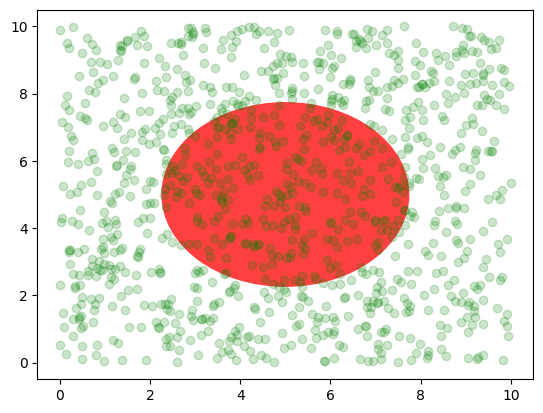

In [25]:
fig, ax = plt.subplots()
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y, 'go', alpha=0.2)  # plot some data in data coordinates

circ = mpatches.Circle((0.5, 0.5), 0.25, transform=ax.transAxes,
                       facecolor='red', alpha=0.75)
ax.add_patch(circ)
plt.show()

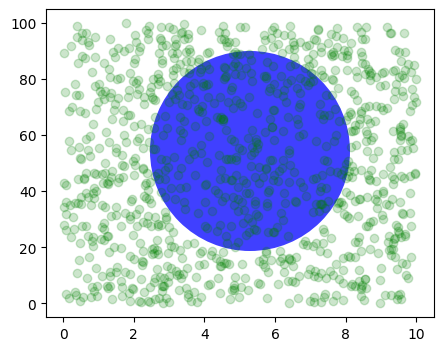

In [26]:
fig, ax = plt.subplots(figsize=(5, 4))
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y*10., 'go', alpha=0.2)  # plot some data in data coordinates
# add a circle in fixed-coordinates
circ = mpatches.Circle((2.5, 2), 1.0, transform=fig.dpi_scale_trans,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()

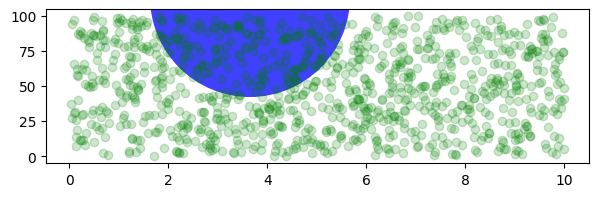

In [27]:
fig, ax = plt.subplots(figsize=(7, 2))
x, y = 10*np.random.rand(2, 1000)
ax.plot(x, y*10., 'go', alpha=0.2)  # plot some data in data coordinates
# add a circle in fixed-coordinates
circ = mpatches.Circle((2.5, 2), 1.0, transform=fig.dpi_scale_trans,
                       facecolor='blue', alpha=0.75)
ax.add_patch(circ)
plt.show()

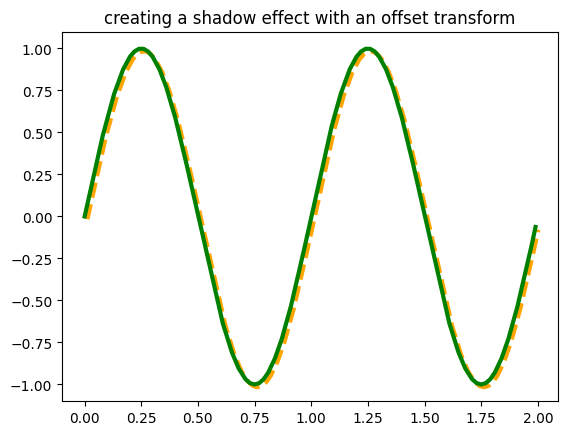

In [33]:
#Using offset transforms to create a shadow effect
import matplotlib.transforms as transforms
fig, ax = plt.subplots()

# make a simple sine wave
x = np.arange(0., 2., 0.01)
y = np.sin(2*np.pi*x)
line, = ax.plot(x, y, lw=3, color='green')

# shift the object over 2 points, and down 2 points
dx, dy = 2/72., -2/72.
offset = transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
shadow_transform = ax.transData + offset

# now plot the same data with our offset transform;
# use the zorder to make sure we are below the line
ax.plot(x, y, lw=3, color='orange',
        transform=shadow_transform,
        zorder=0.5*line.get_zorder())

ax.set_title('creating a shadow effect with an offset transform')
plt.show()